# Helmholtz Coil

Magnetic field due to a circular loop carrying current $I$ of radius $R$ along the axis at distance $z$ is  
$$\vec{B}(z)=\dfrac{\mu_o{}I}{4\pi}\,\dfrac{2\pi R^2}{(R^2 + z^2)^{\frac{3}{2}}}\hat{z}$$  
Consider two identical coaxial coils separated by distance $d$.  

<center>
    <img src="https://physicsx.erau.edu/HelmholtzCoils/spacing.jpg" width=300 height=280 />
    <img src="https://upload.wikimedia.org/wikipedia/commons/c/c9/Helmholtz_coil_magnetic_field_lines.svg" width=300 height=280 />
</center>


Plot the magnitude of magnetic field along the axis from one coil to the other coil.  
(**Hint:** value $\frac{\mu_o I}{4\pi}$ is not important here, that will only decide scaling factor. Take $R = 1$. Take distance $d$ arbitrary (anything between 0.2 to 5).   

Now from distance 0 (at the centre of 1st coil) to $d$ (centre of the 2nd coil), divide the interval in, say, 20 intervals and find at each point, magnetic field due to 1st coil and that due to 2nd coil and add them. $z$ is the distance of the point from a coil.  

Hence for the given point it will be different for each coil. 
Plot the graph of total magnetic field as a function of distance from centre of first coil to centre of
second coil.  
See how the field variation looks when $d$ is changed to different values.  
Helmholtz coil has the separation exactly $R$. i.e. when $d = 1$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import pi,mu_0  # importing constants
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 600

In [2]:
def Helmholtz(I:'current',R:'Radius',d:'distance between coil',l:'lowerlimit',u:'upperlimit'):
    """Docstring for Helmholtz

    Args:
        I (current): [In Amps]
        R (Radius): [In Meters]
        d (distance between coil): [In Meters]
        l (lowerlimit): [For lower bound of z(distance from coil)]
        u (upperlimit): [For upper bound of z(distance from coil)]
    """
    def magnetic_field(z):
        return (mu_0*I/4/pi)*((2*pi*R**2)/(R**2+z**2)**1.5)

    z = np.linspace(l,u,200)
    B1 = [] # For coil 1
    B2 = [] # For coil 2
    B = []  # For net magnetic field coil 1 + coil 2
    for j in range(len(z)):
        B1.append(magnetic_field(z[j]))
        B2.append(magnetic_field(d-z[j]))
        B.append(B1[j]+B2[j])
    plt.plot(z,B1,label="B of coil 1")
    plt.plot(z,B2,label="B of coil 2")
    plt.plot(z,B,label="Net B")
    plt.xlabel("Distance in meters")
    plt.ylabel("Magnetic field in Tesla")

    # lets mark the distance between 2 coils by the function plt.hlines
    # it takes the arguments (yposition,xmin,xmax,linestyle,color,linewidth,**kwargs)
    # I have used xmin as 0 and xmax as d, and y level just above the max value of B

    plt.hlines(y=(np.max(B1)+0.2e-7),xmin=0,xmax=d,linestyle='--',color='k',label=f"d = {d} units")

    plt.title(f"Magnetic field of Helmholtz Coil of {R} m Radius and \nFor {I} A",fontsize='x-large')
    plt.legend()
    plt.grid(':')

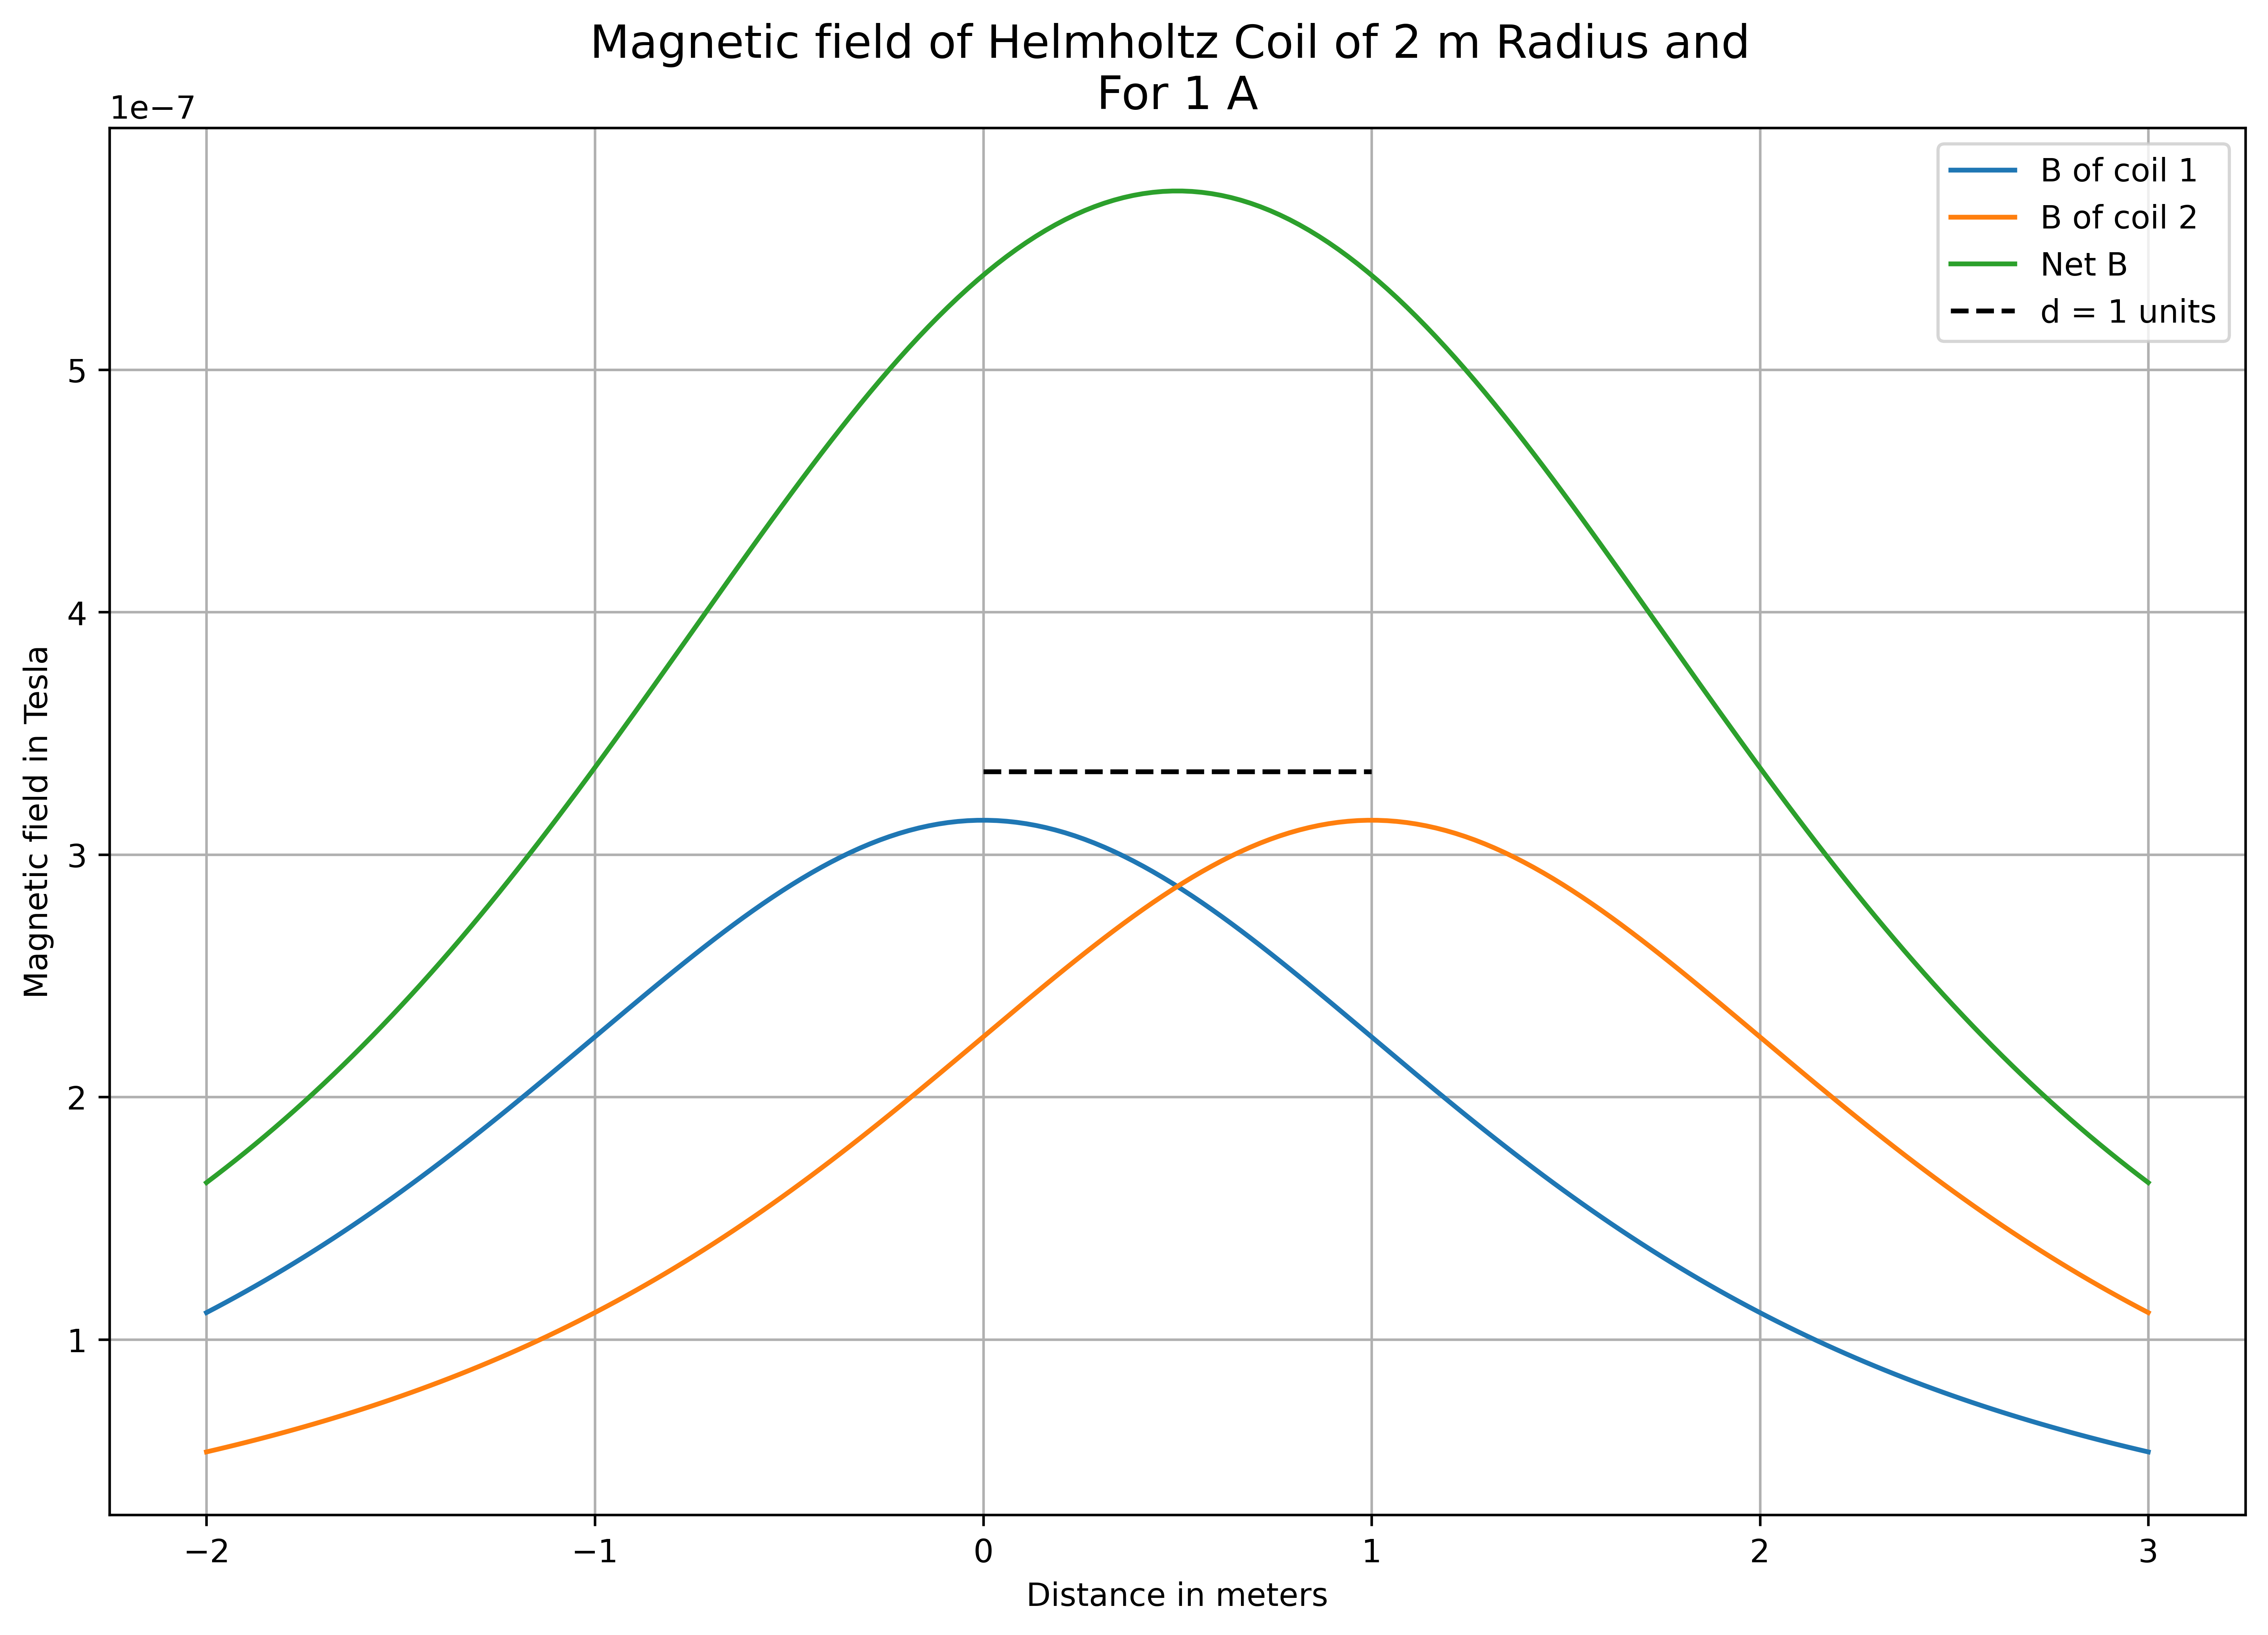

In [3]:
Helmholtz(1,2,1,-2,3)

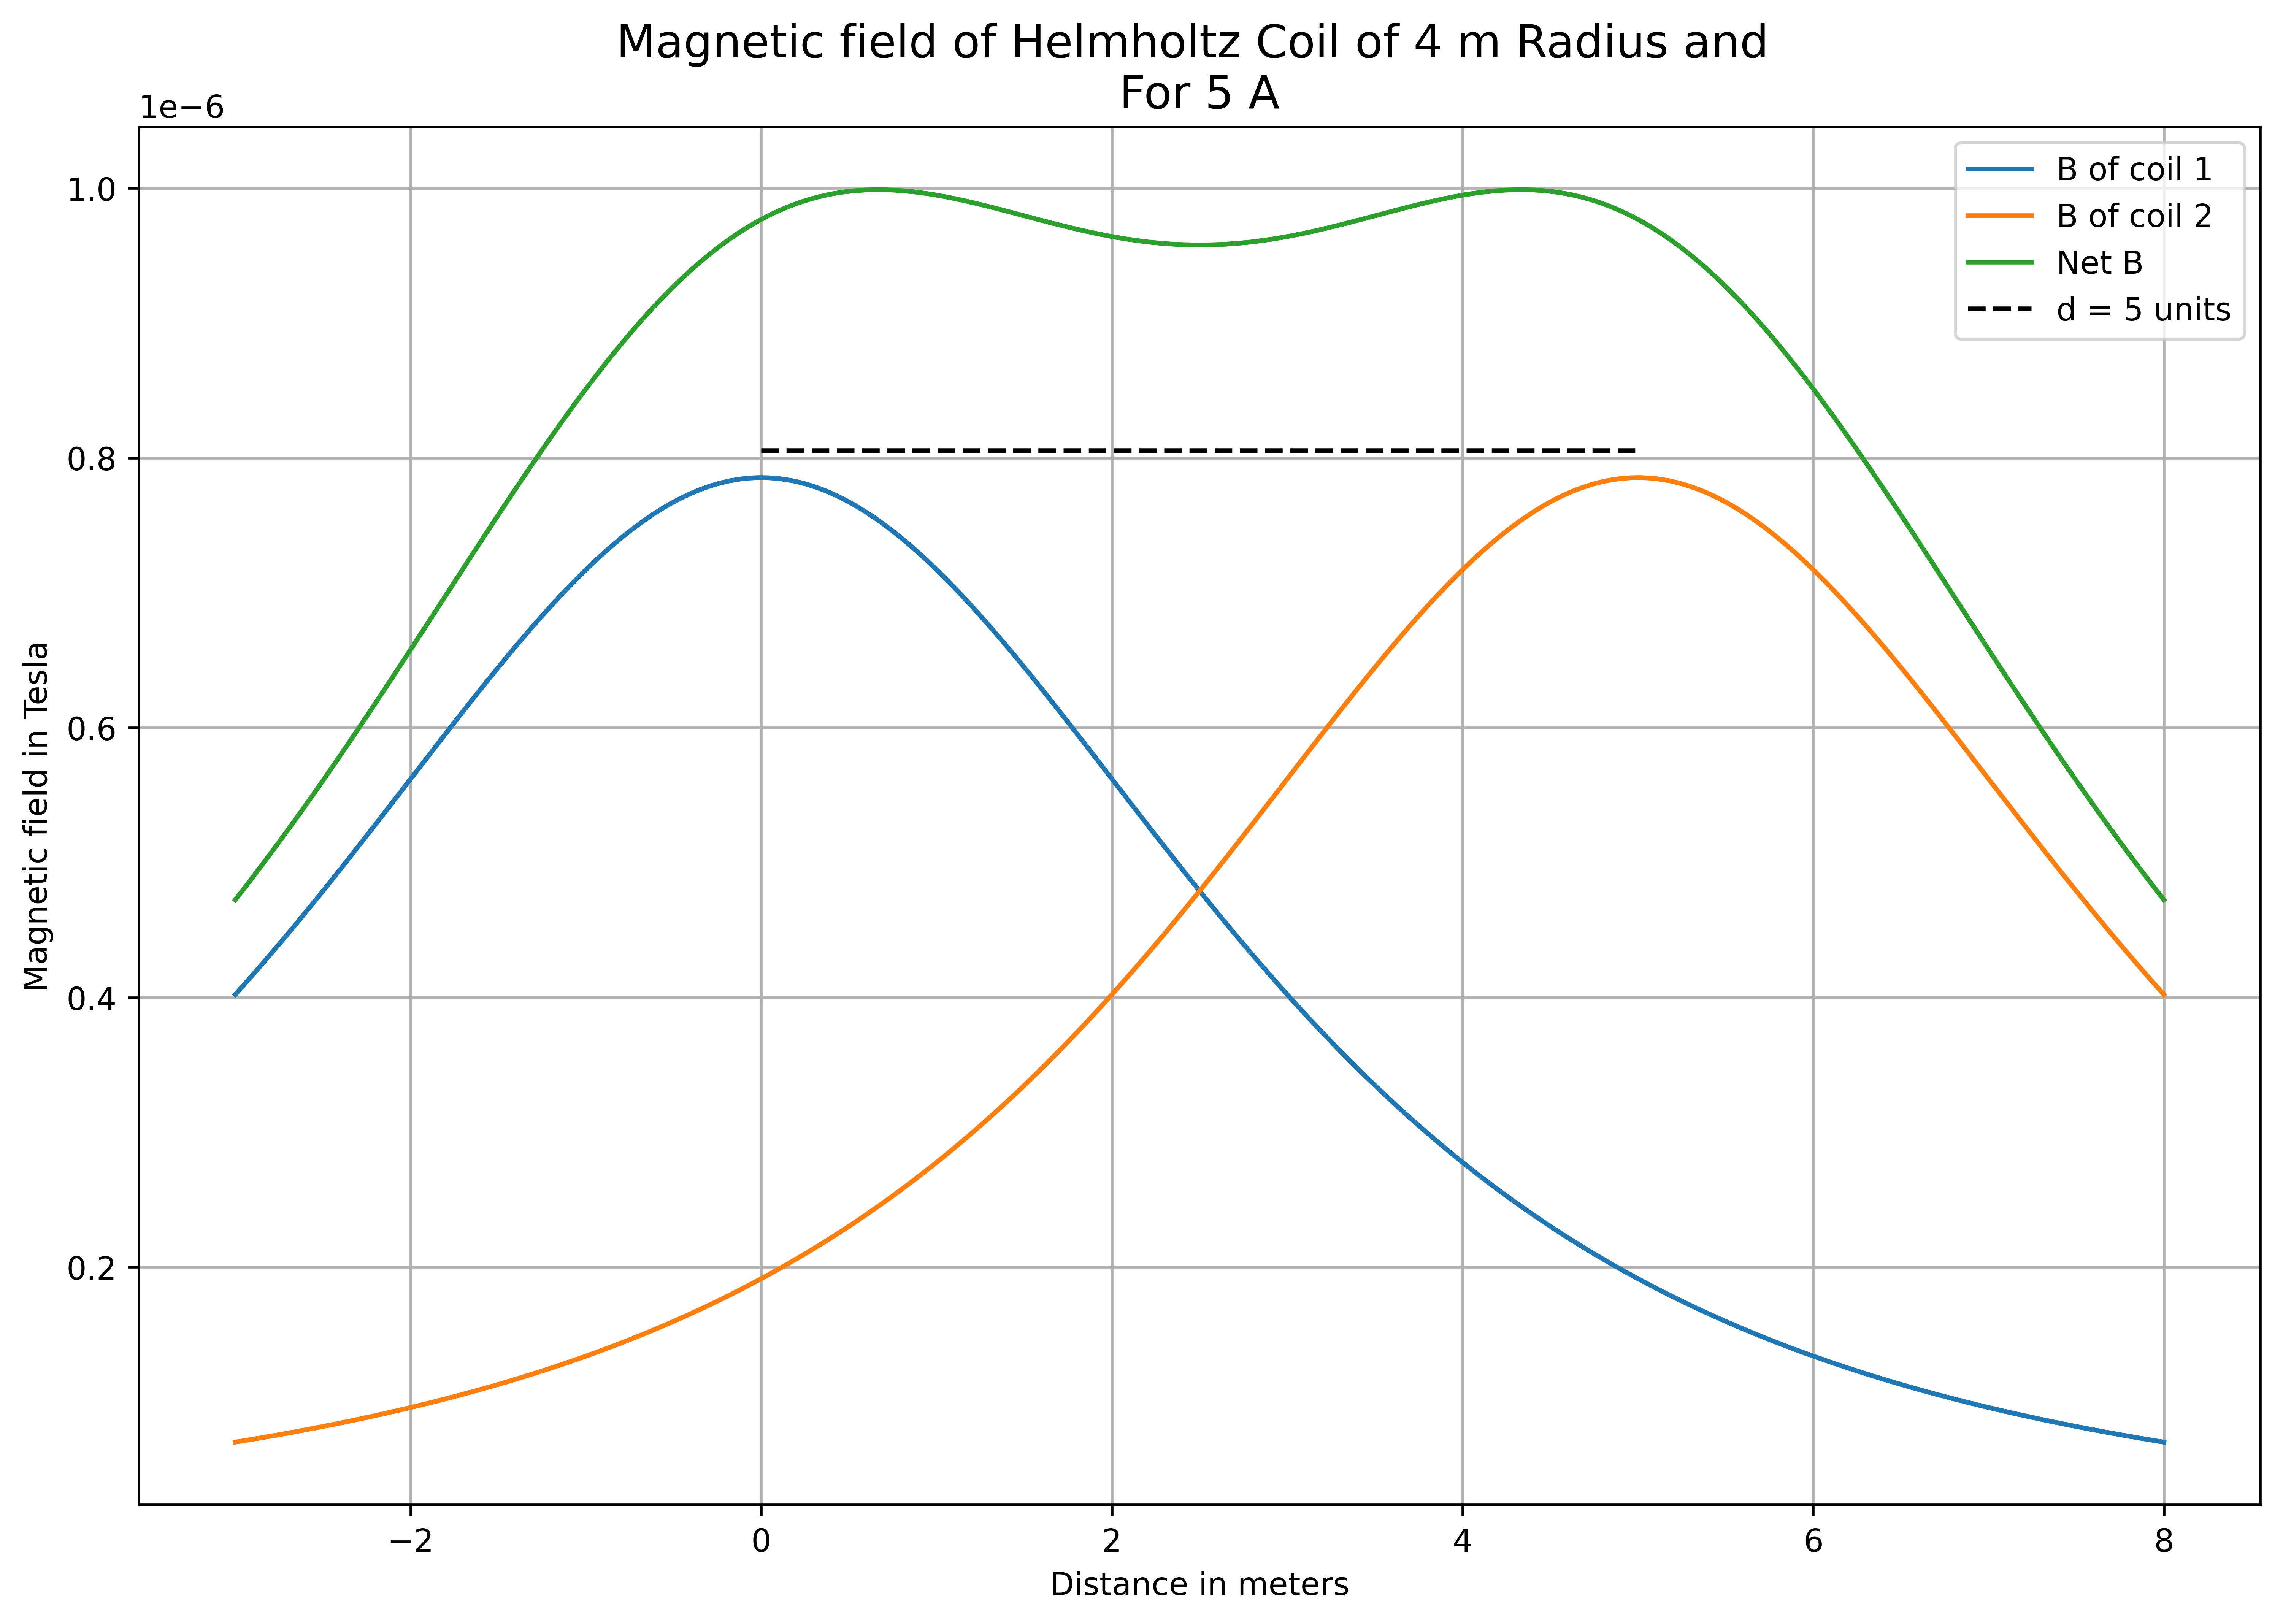

In [4]:
Helmholtz(5,4,5,-3,8)

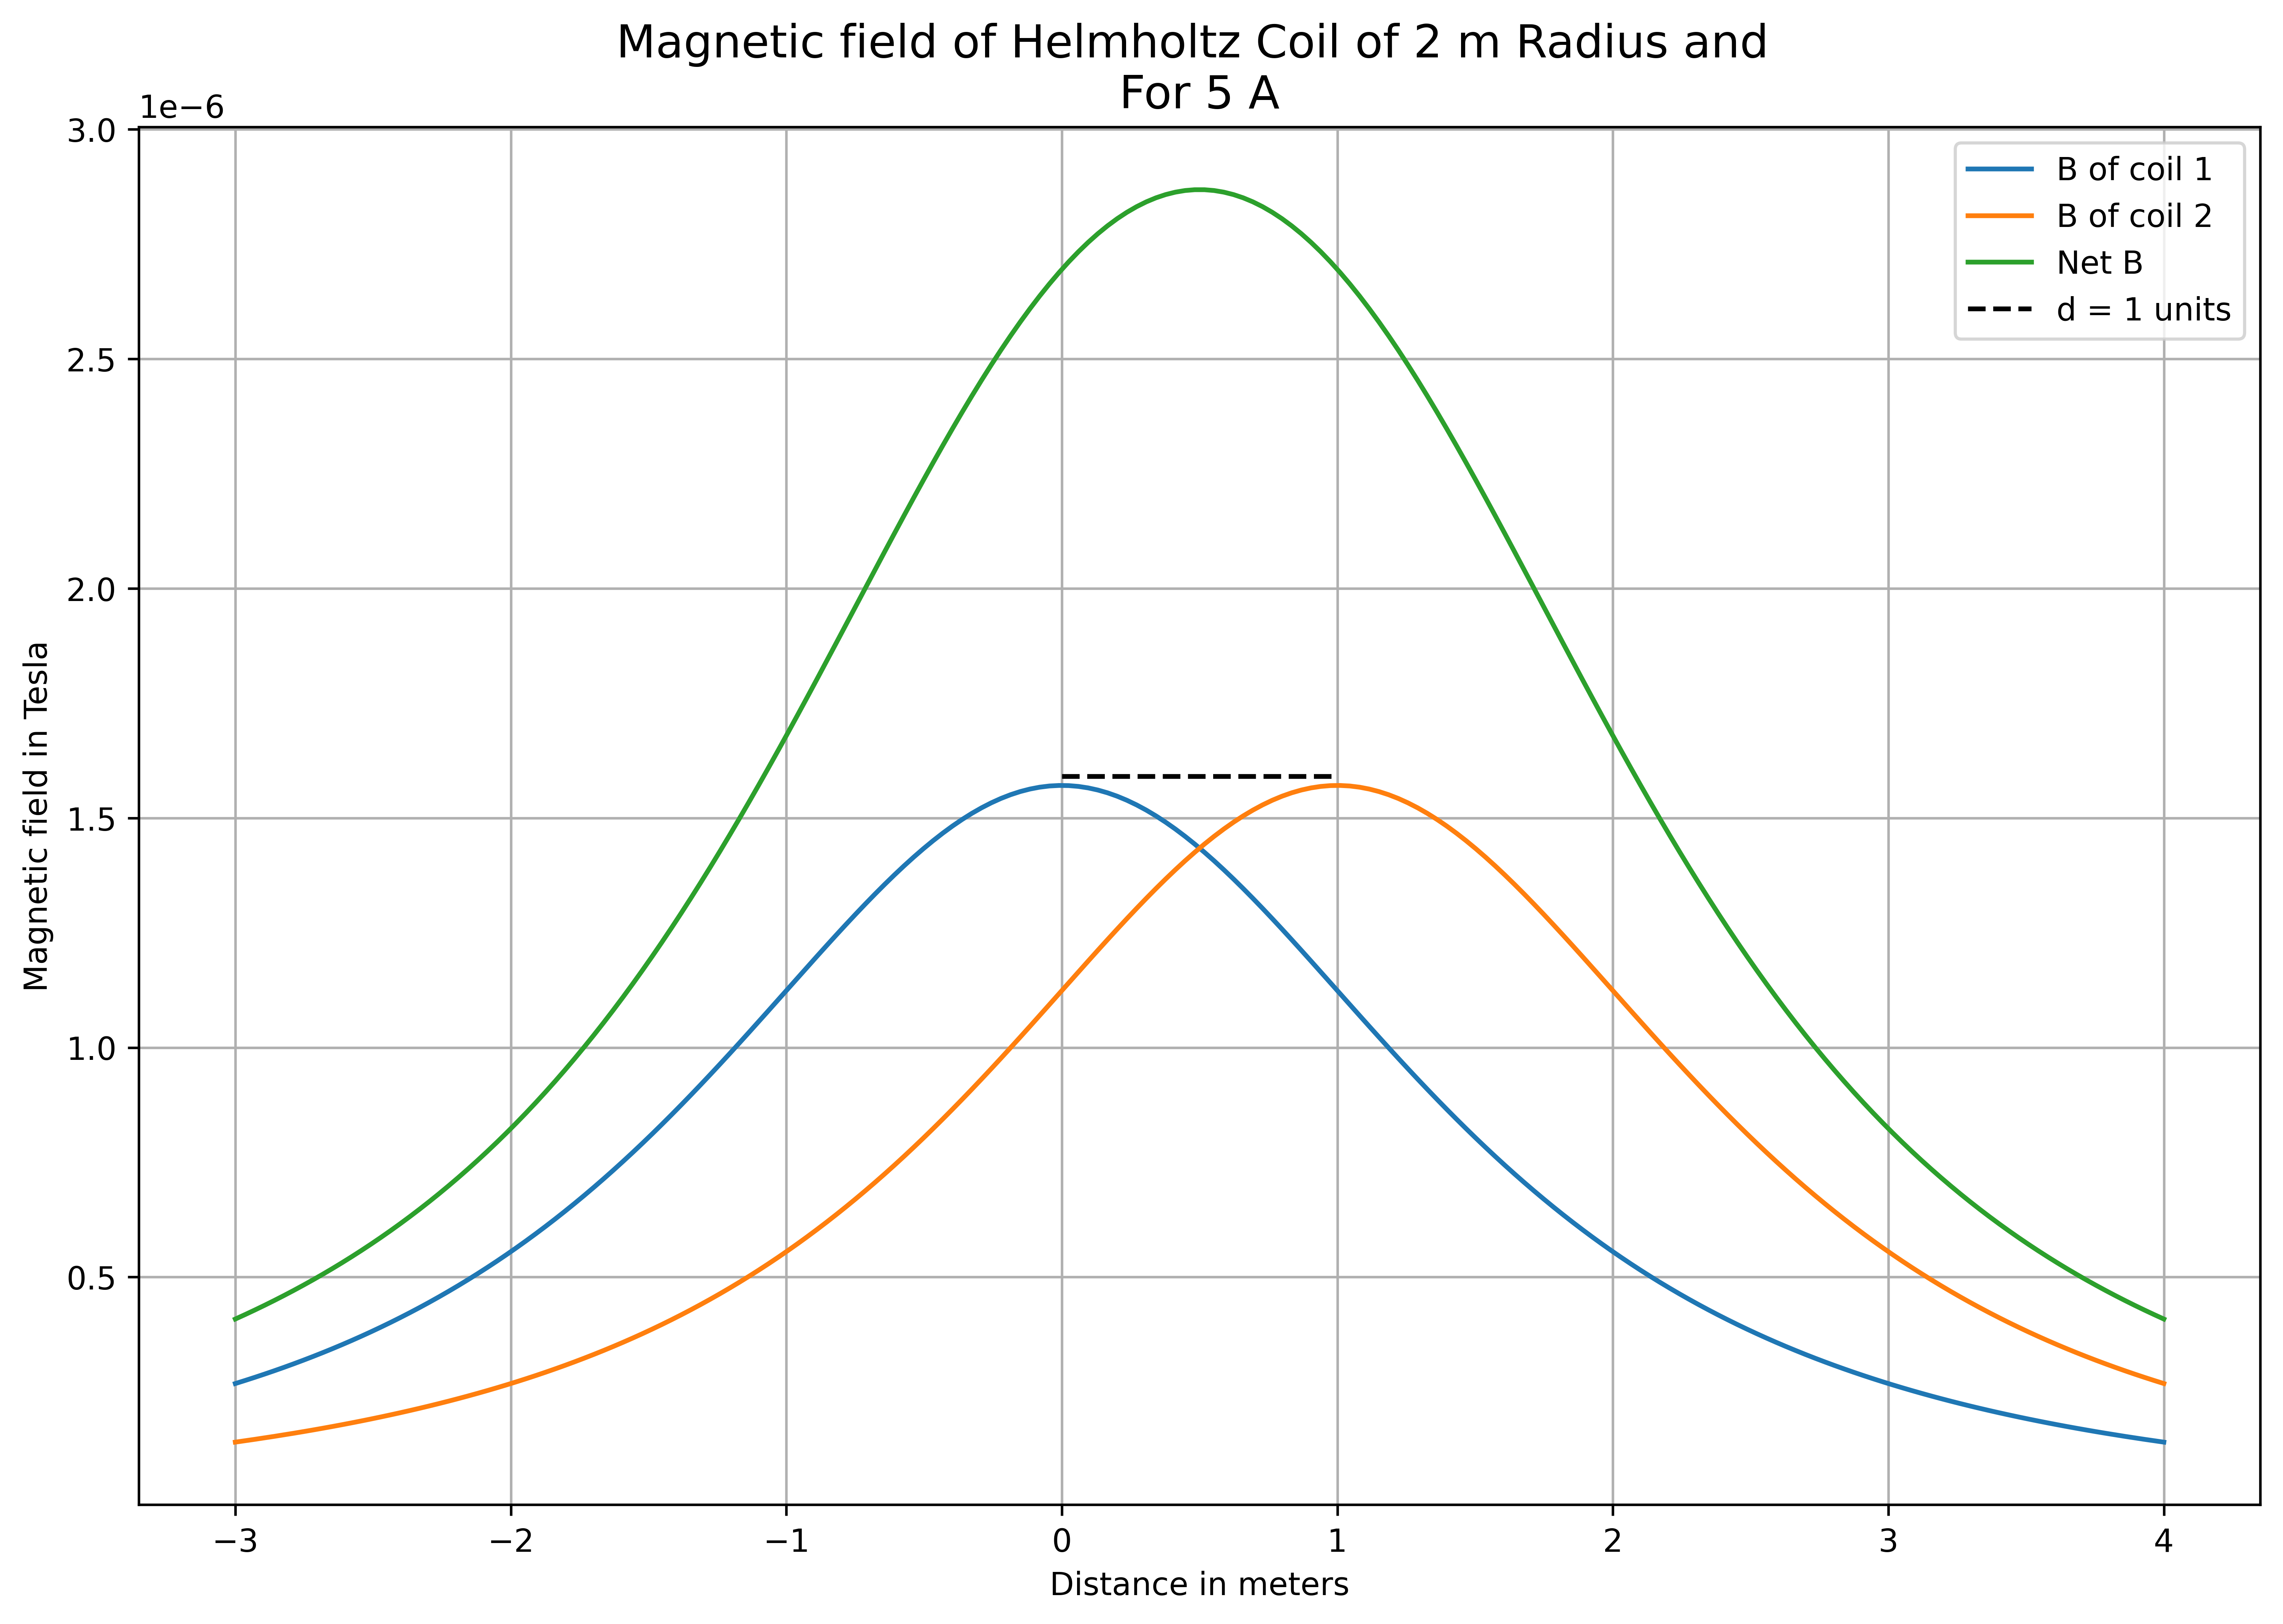

In [5]:
Helmholtz(5, 2, 1, -3, 4)

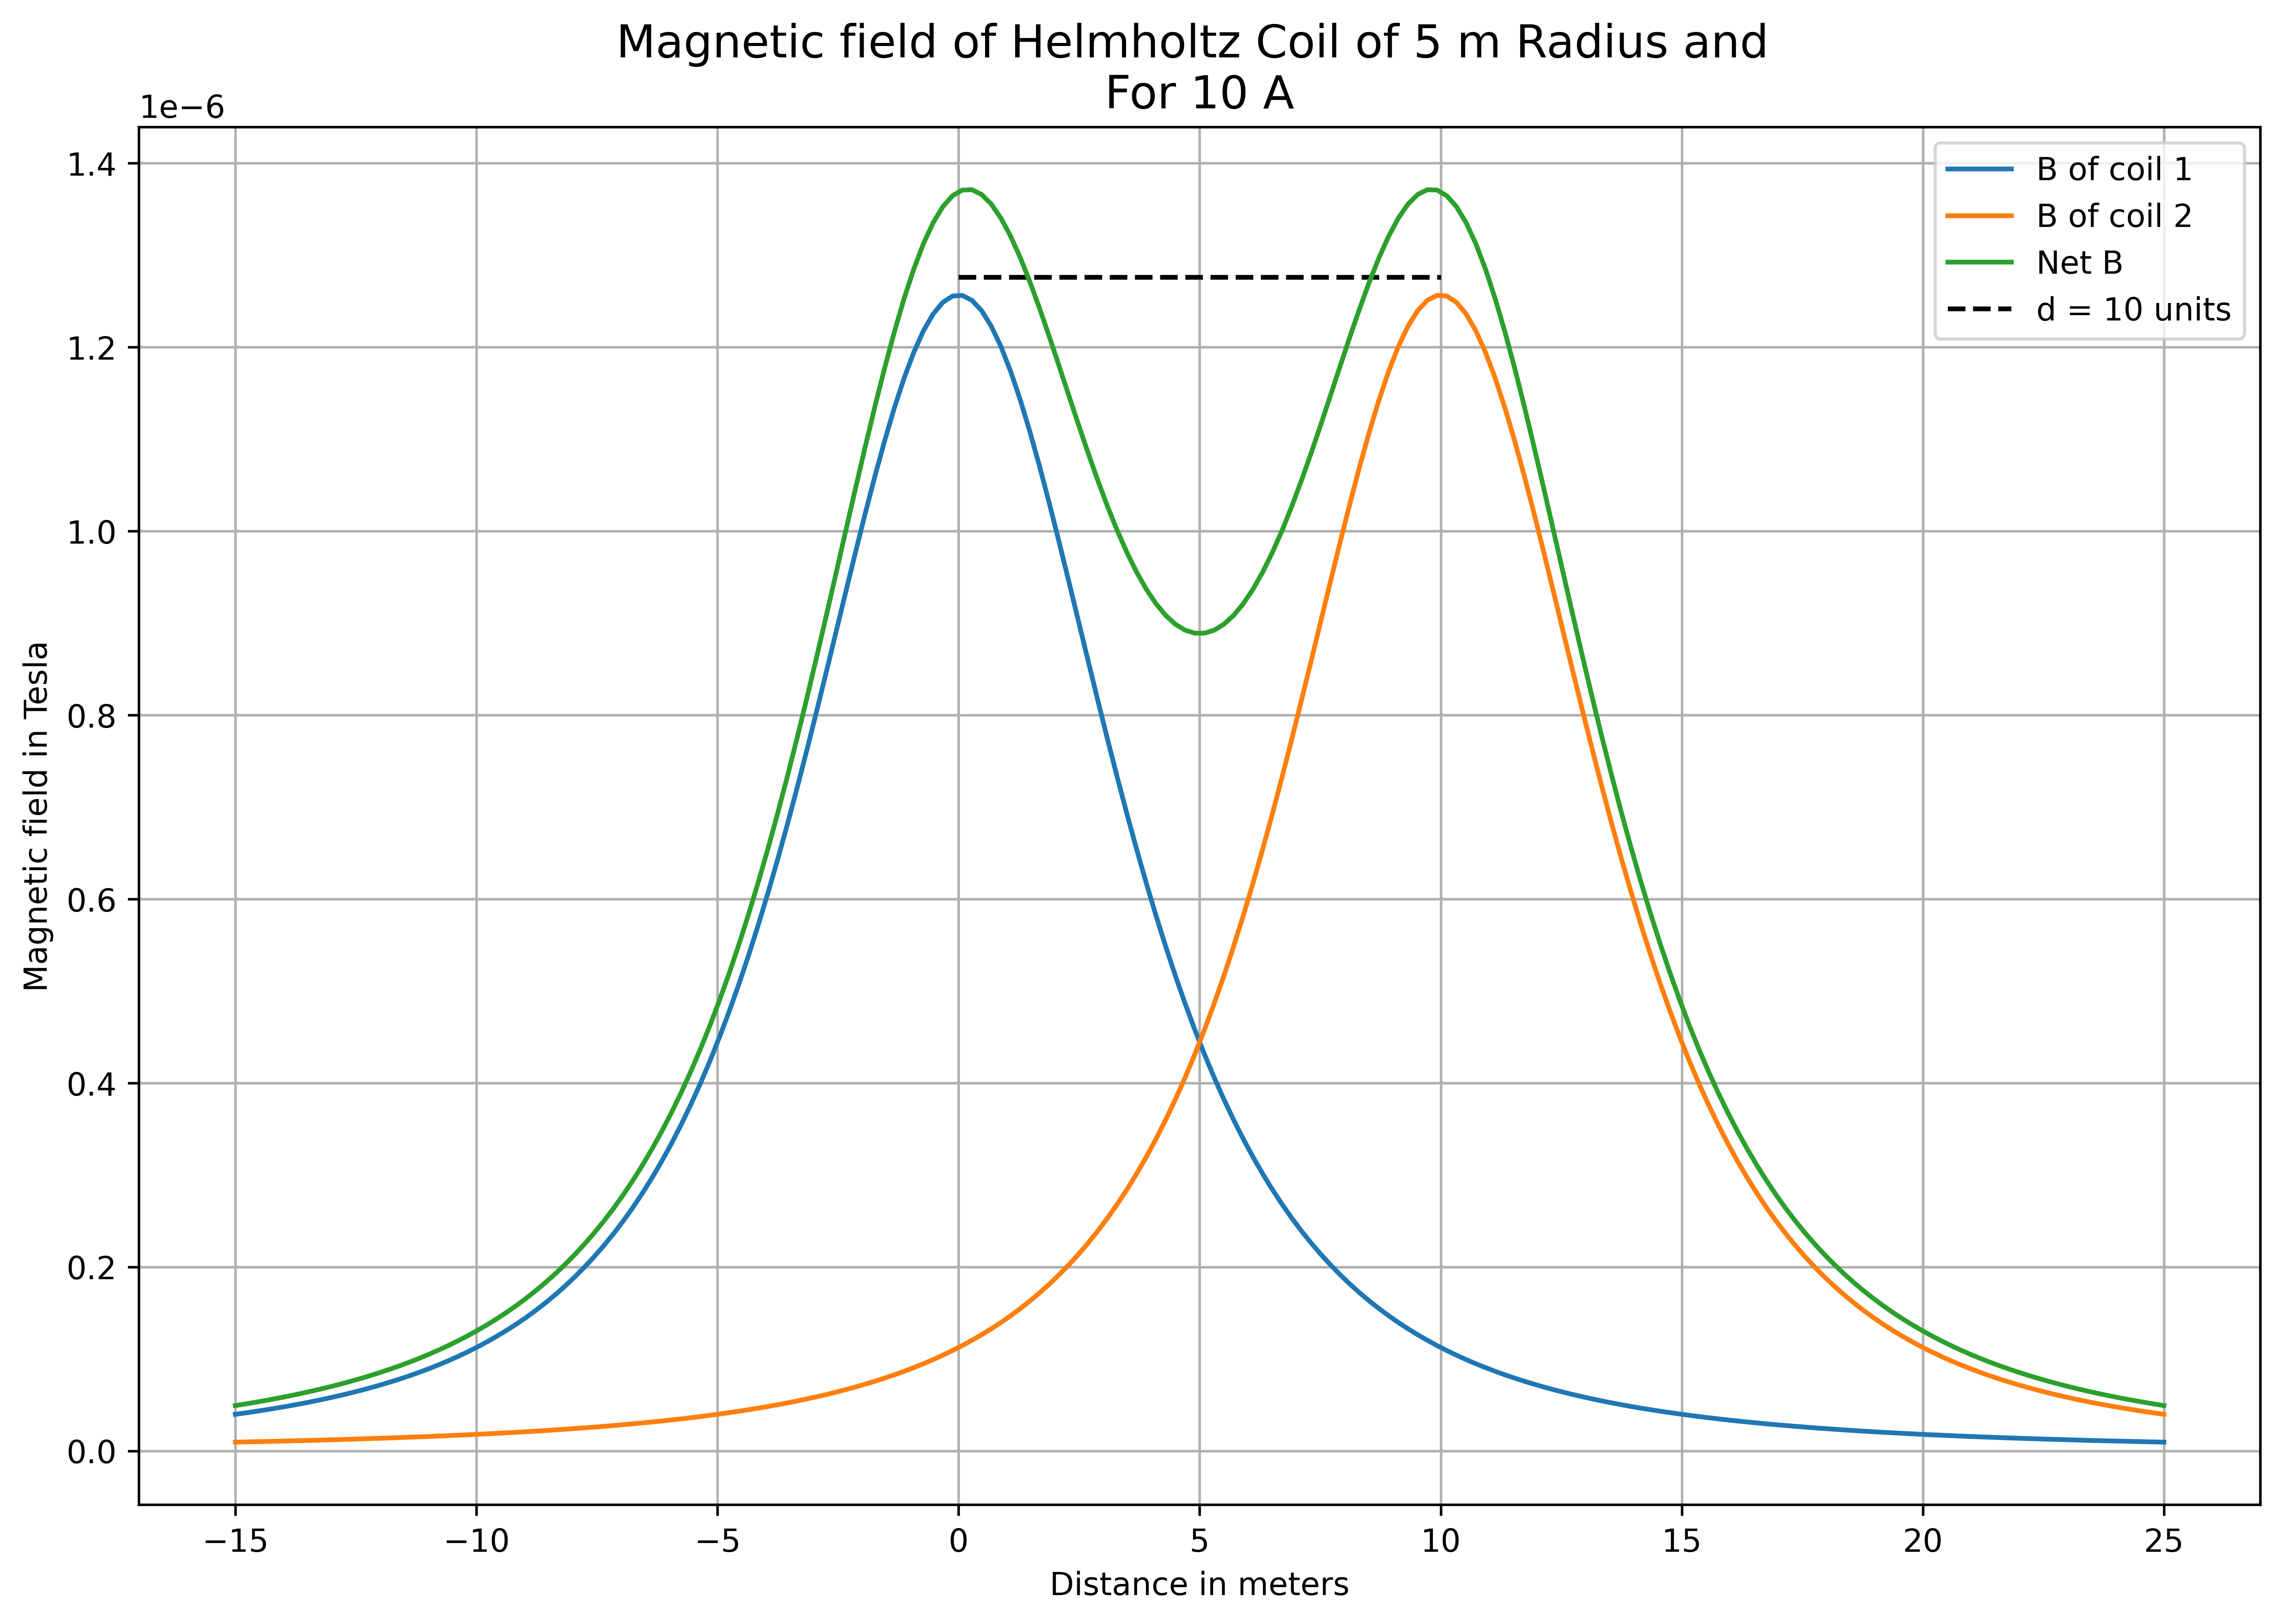

In [6]:
Helmholtz(10,5,10,-15,25)